(540, 2500) (540,)


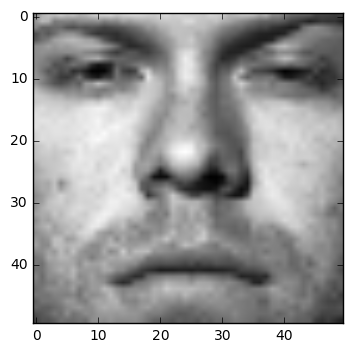

In [29]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from ipywidgets import interact, interactive
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)


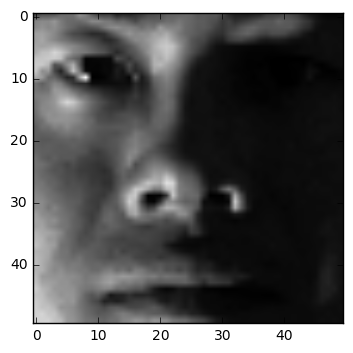

In [30]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

#Compute the average face
avgFace = [];
for i in range(0, train_data.shape[1]):
    avgFace.append(train_data[:, i].sum() / train_data.shape[0])

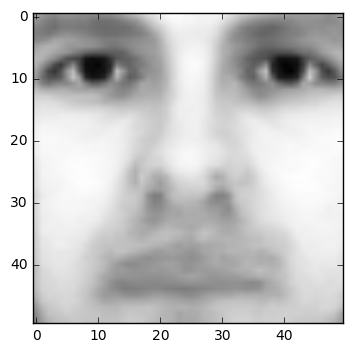

In [31]:
avgFace = np.array(avgFace)
plt.imshow(avgFace.reshape(50,50), cmap = cm.Greys_r)
plt.show()

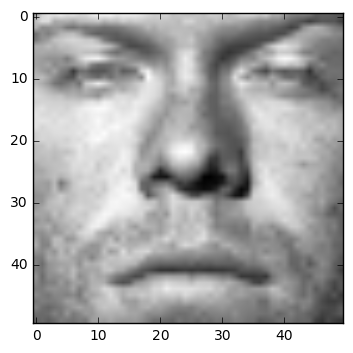

In [32]:
for i in range(0, train_data.shape[0]):
    train_data[i] = train_data[i] - avgFace
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

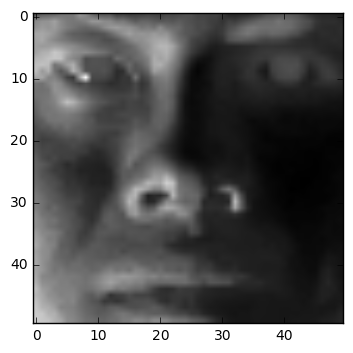

In [33]:
for i in range(0, test_data.shape[0]):
    test_data[i] = test_data[i] - avgFace
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [34]:
U, s, V = np.linalg.svd(train_data, full_matrices=False)

In [35]:
print(V.shape)

(540, 2500)


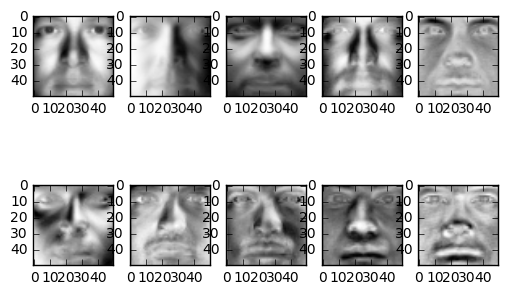

In [36]:
def show_image(n):
    plt.imshow(V[n, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()
    
# interact(show_image, n=(0, 9));
f, arrayofImages = plt.subplots(2, 5)
n = 0
for i in range(0, 2):
    for j in range(0, 5):
        arrayofImages[i, j].imshow(V[n, :].reshape(50,50), cmap = cm.Greys_r)
        n += 1

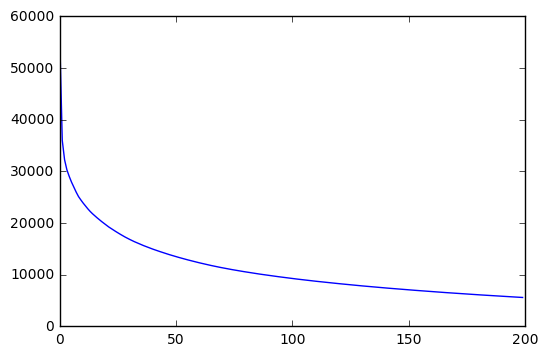

In [37]:
sMtx = np.diag(s)
x_approx_error = []
for r in range(1, 201):
    xError = np.dot(np.dot(U[:, :r], sMtx[: r, : r]), V[: r, :])
    x_approx_error.append(np.linalg.norm(train_data - xError))
plt.plot(x_approx_error)

In [42]:
#Getting F and F_test
def generateFandFtest(n):
    V_t = np.transpose(V[: n, :])
    f = np.matmul(train_data, V_t)
    f_test = np.matmul(test_data, V_t)
    return f, f_test

logReg = LogisticRegression()
f, f_test = generateFandFtest(10)
logReg.fit(f, train_labels)
results = logReg.predict(f_test)
acc = accuracy_score(test_labels, results)
print(acc)


0.79


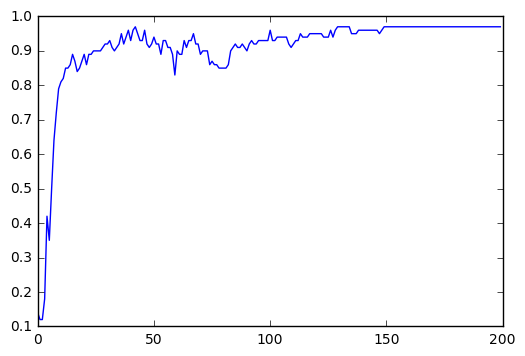

In [28]:
listAcc = []
logReg = LogisticRegression()
for i in range(1, 201):
    f, f_test = generateFandFtest(i)
    logReg.fit(f, train_labels)
    results = logReg.predict(f_test)
    acc = accuracy_score(test_labels, results)
    listAcc.append(acc)
plt.plot(listAcc)